In [1]:
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('players.csv')

In [3]:
#no data for NCAA efg%, lots of missing data for nba efg %; two unnecessary cols
data.drop(columns=['NCAA_efgpct','NBA_efgpct','url','Unnamed: 0'], inplace=True)

#drop rows without ncaa data
data.dropna(subset=['NCAA_games'], inplace=True)

#null values in 3 point columns - assuming this means 0
#going to leave the 3 point percentage columns as nan because it's 0/0
data.loc[data['NBA__3ptapg'].isnull(),'NBA__3ptapg']=0
data.loc[data['NBA__3ptpg'].isnull(),'NBA__3ptpg']=0
data.loc[data['NCAA__3ptapg'].isnull(),'NCAA__3ptapg']=0
data.loc[data['NCAA_ftapg'].isnull(),'NCAA_ftapg']=0
data.loc[data['NCAA_fgapg'].isnull(),'NCAA_fgapg']=0
data.loc[data['NCAA__3ptpg'].isnull(),'NCAA__3ptpg']=0
data.loc[data['NCAA_ft'].isnull(),'NCAA_ft']=0

#columns with missing values - to be aware of
for c in data.columns:
    if sum(data[c].isna())>0:
        print(c)
        print(sum(data[c].isna()))

NBA__3ptpct
372
NBA_fg%
15
NBA_ft%
111
NCAA__3ptpct
872
NCAA_fgpct
16


In [4]:
data.reset_index(inplace=True)

In [5]:
for i in range(len(data)):
    l = data['height'][i].split('-')
    data['height'][i]=int(l[0])*12+int(l[1])

C:\Users\mtoll\AppData\Local\Temp\ipykernel_20772\626188626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['height'][i]=int(l[0])*12+int(l[1])
C:\Users\mtoll\AppData\Local\Temp\ipykernel_20772\626188626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['height'][i]=int(l[0])*12+int(l[1])
C:\Users\mtoll\AppData\Local\Temp\ipykernel_20772\626188626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['height'][i]=int

C:\Users\mtoll\AppData\Local\Temp\ipykernel_20772\626188626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['height'][i]=int(l[0])*12+int(l[1])
C:\Users\mtoll\AppData\Local\Temp\ipykernel_20772\626188626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['height'][i]=int(l[0])*12+int(l[1])
C:\Users\mtoll\AppData\Local\Temp\ipykernel_20772\626188626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['height'][i]=int

C:\Users\mtoll\AppData\Local\Temp\ipykernel_20772\626188626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['height'][i]=int(l[0])*12+int(l[1])
C:\Users\mtoll\AppData\Local\Temp\ipykernel_20772\626188626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['height'][i]=int(l[0])*12+int(l[1])
C:\Users\mtoll\AppData\Local\Temp\ipykernel_20772\626188626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['height'][i]=int

In [6]:
#create dummy variables for positions

recent = data[data['active_from']>2004]
positions = pd.get_dummies(recent['position'],dtype=int)
updated = recent.merge(positions, right_index=True, left_index=True)

In [9]:
#create catch all columns for similar positions
updated['allC']=updated['C']+updated['C-F']+updated['F-C']
updated['allF']=updated['F']+updated['C-F']+updated['F-C']+updated['F-G']+updated['G-F']
updated['allG']=updated['G']+updated['F-G']+updated['G-F']

In [10]:
nba_cols = ['NBA__3ptapg', 'NBA__3ptpct',
       'NBA__3ptpg', 'NBA_fg%', 'NBA_fg_per_game', 'NBA_fga_per_game',
       'NBA_ft%', 'NBA_ft_per_g', 'NBA_fta_p_g', 'NBA_g_played', 'NBA_ppg']
ncaa_cols = ['NCAA__3ptapg', 'NCAA__3ptpct', 'NCAA__3ptpg', 'NCAA_fgapg',
       'NCAA_fgpct', 'NCAA_fgpg', 'NCAA_ft', 'NCAA_ftapg', 'NCAA_ftpg',
       'NCAA_games', 'NCAA_ppg']
cor_cols = ['NBA__3ptapg', 'NBA__3ptpct', 'NBA__3ptpg', 'NBA_fg%', 'NBA_fg_per_game', 'NBA_fga_per_game',
       'NBA_ft%', 'NBA_ft_per_g', 'NBA_fta_p_g', 'NBA_g_played', 'NBA_ppg', 'NCAA__3ptapg', 'NCAA__3ptpct', 'NCAA__3ptpg', 'NCAA_fgapg',
       'NCAA_fgpct', 'NCAA_fgpg', 'NCAA_ft', 'NCAA_ftapg', 'NCAA_ftpg', 'NCAA_games', 'NCAA_ppg', 
            'height', 'weight', 'C', 'C-F', 'F', 'F-C', 'F-G', 'G', 'G-F','allG','allF','allC']

<Axes: >

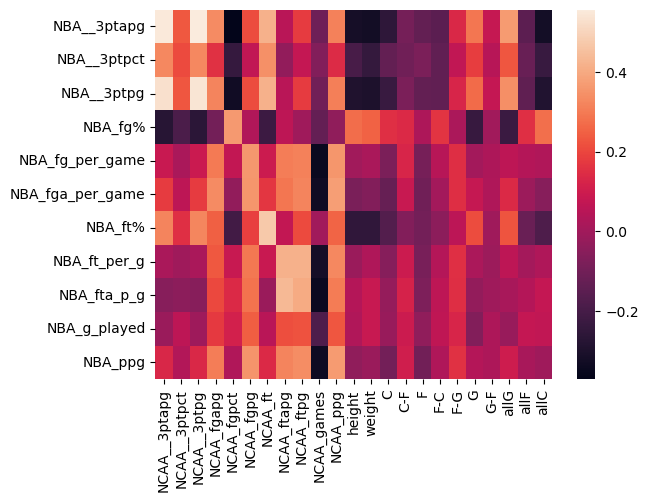

In [11]:
c = updated.loc[:,cor_cols].corr()
sns.heatmap(c.iloc[0:11,11:])

strongest correlations appear to be in the 3 point attempt / scored per game between NCAA and NBA, and the field goals per game.

Generally, NCAA games are negatively correlated to all NBA statistics - higher likelihood of injury?

<Axes: >

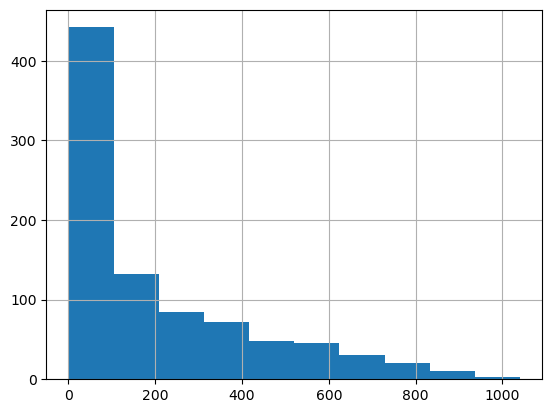

In [12]:
updated['NBA_g_played'].hist(bins=10)

In [13]:
updated['g_category']=(updated['NBA_g_played']>200)*1

updated['active_yrs'] = (updated['active_to']-updated['active_from'])+1

updated['g_per_year'] = updated['NBA_g_played']/updated['active_yrs']

<Axes: >

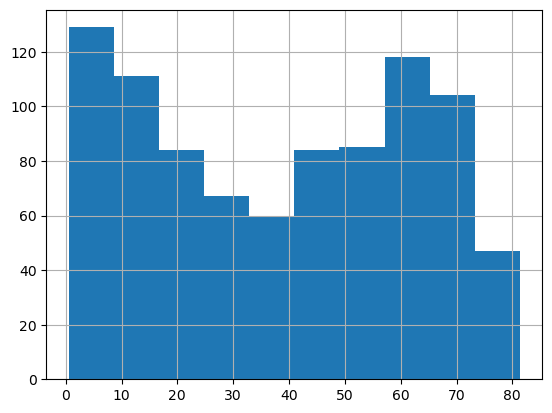

In [14]:
updated['g_per_year'].hist()

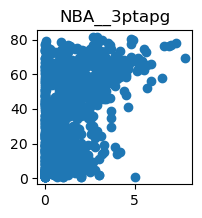

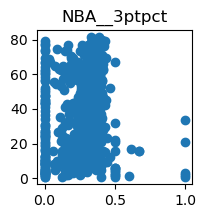

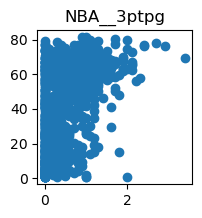

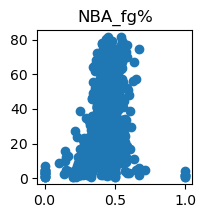

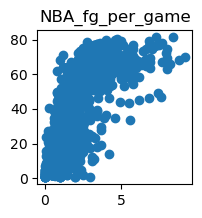

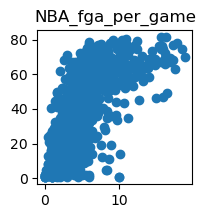

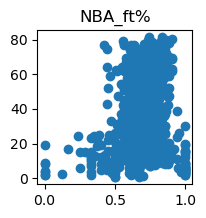

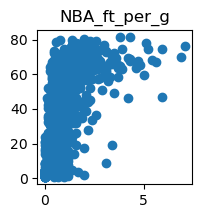

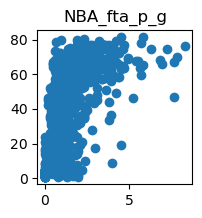

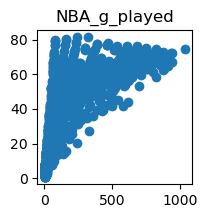

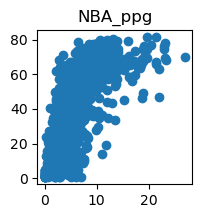

In [15]:
for c in nba_cols:
    plt.figure(figsize=(2,2))
    plt.scatter(updated[c],updated['g_per_year'])
    plt.title(c)
    plt.show()

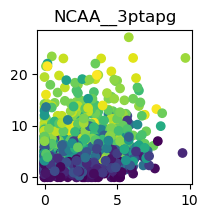

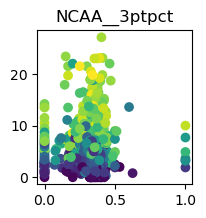

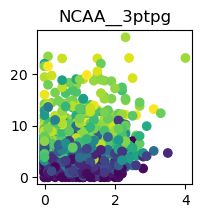

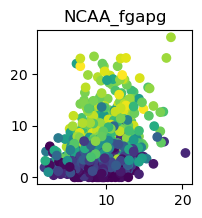

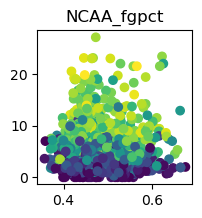

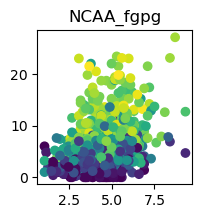

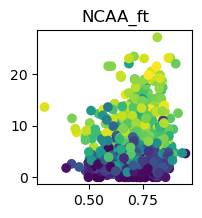

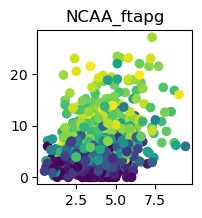

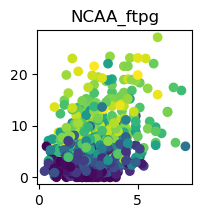

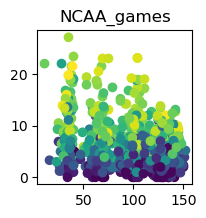

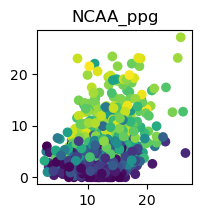

In [16]:
#new data set: active in the past 20 years


for c in ncaa_cols:
    plt.figure(figsize=(2,2))
    plt.scatter(updated[c],updated['NBA_ppg'], c=updated['g_per_year'])
    plt.title(c)
    plt.show()

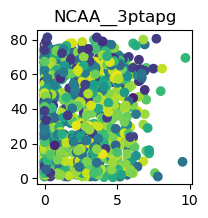

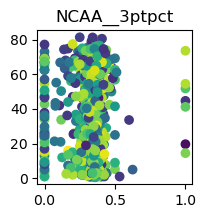

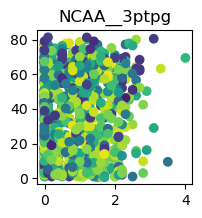

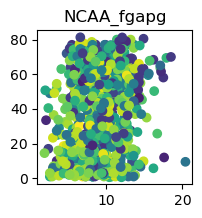

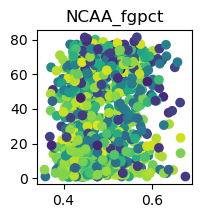

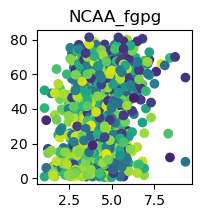

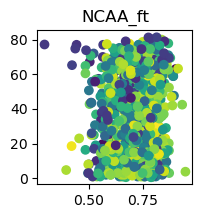

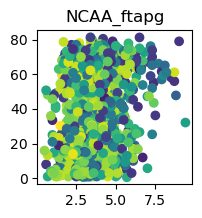

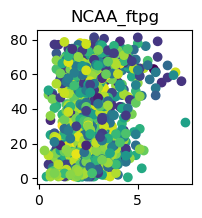

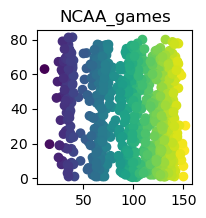

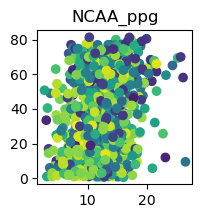

In [17]:
for c in ncaa_cols:
    plt.figure(figsize=(2,2))
    plt.scatter(updated[c],updated['g_per_year'],c=updated['NCAA_games'])
    plt.title(c)
    plt.show()

In [18]:
#group by year to find any correlation in strength of field ish?

gb = updated[['active_from','NBA__3ptapg', 'NBA__3ptpct',
       'NBA__3ptpg', 'NBA_fg%', 'NBA_fg_per_game', 'NBA_fga_per_game',
       'NBA_ft%', 'NBA_ft_per_g', 'NBA_fta_p_g', 'NBA_g_played', 'NBA_ppg',
       'NCAA__3ptapg', 'NCAA__3ptpct', 'NCAA__3ptpg', 'NCAA_fgapg',
       'NCAA_fgpct', 'NCAA_fgpg', 'NCAA_ft', 'NCAA_ftapg', 'NCAA_ftpg',
       'NCAA_games', 'NCAA_ppg','height','weight']].groupby(['active_from']).mean()

<Axes: >

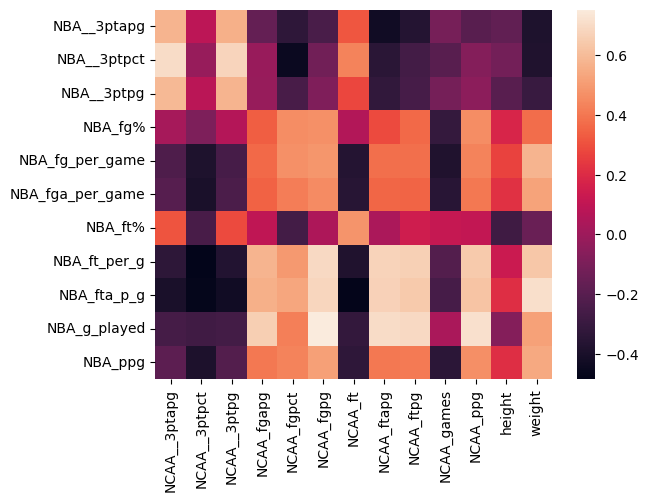

In [19]:
c = gb.corr()
sns.heatmap(c.iloc[0:11,11:])

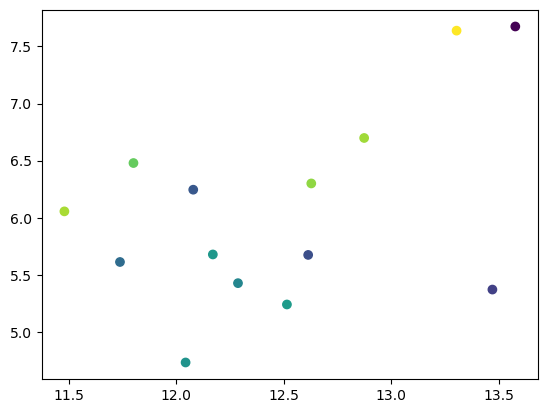

In [20]:
plt.scatter(gb['NCAA_ppg'],gb['NBA_ppg'],c=gb['height'])

In [21]:
#general linear regression model - not great
reg = LinearRegression()
reg.fit(updated[['NCAA_fgpg','NCAA_ftpg', 'NCAA_games','height', 'C', 'C-F', 'F', 'F-C', 'F-G', 'G', 'G-F']],updated['NBA_ppg'])
reg.score(updated[['NCAA_fgpg','NCAA_ftpg','NCAA_games', 'height', 'C', 'C-F', 'F', 'F-C', 'F-G', 'G', 'G-F']],updated['NBA_ppg'])

0.23991040163818822

In [25]:
updated['NBA_category']=pd.cut(updated['NBA_ppg'],bins=6,labels=['0-4.5','4.5-9','9-13.5','13.5-18','18-22.5','22.5-27'])
train, test = train_test_split(updated, random_state=47)

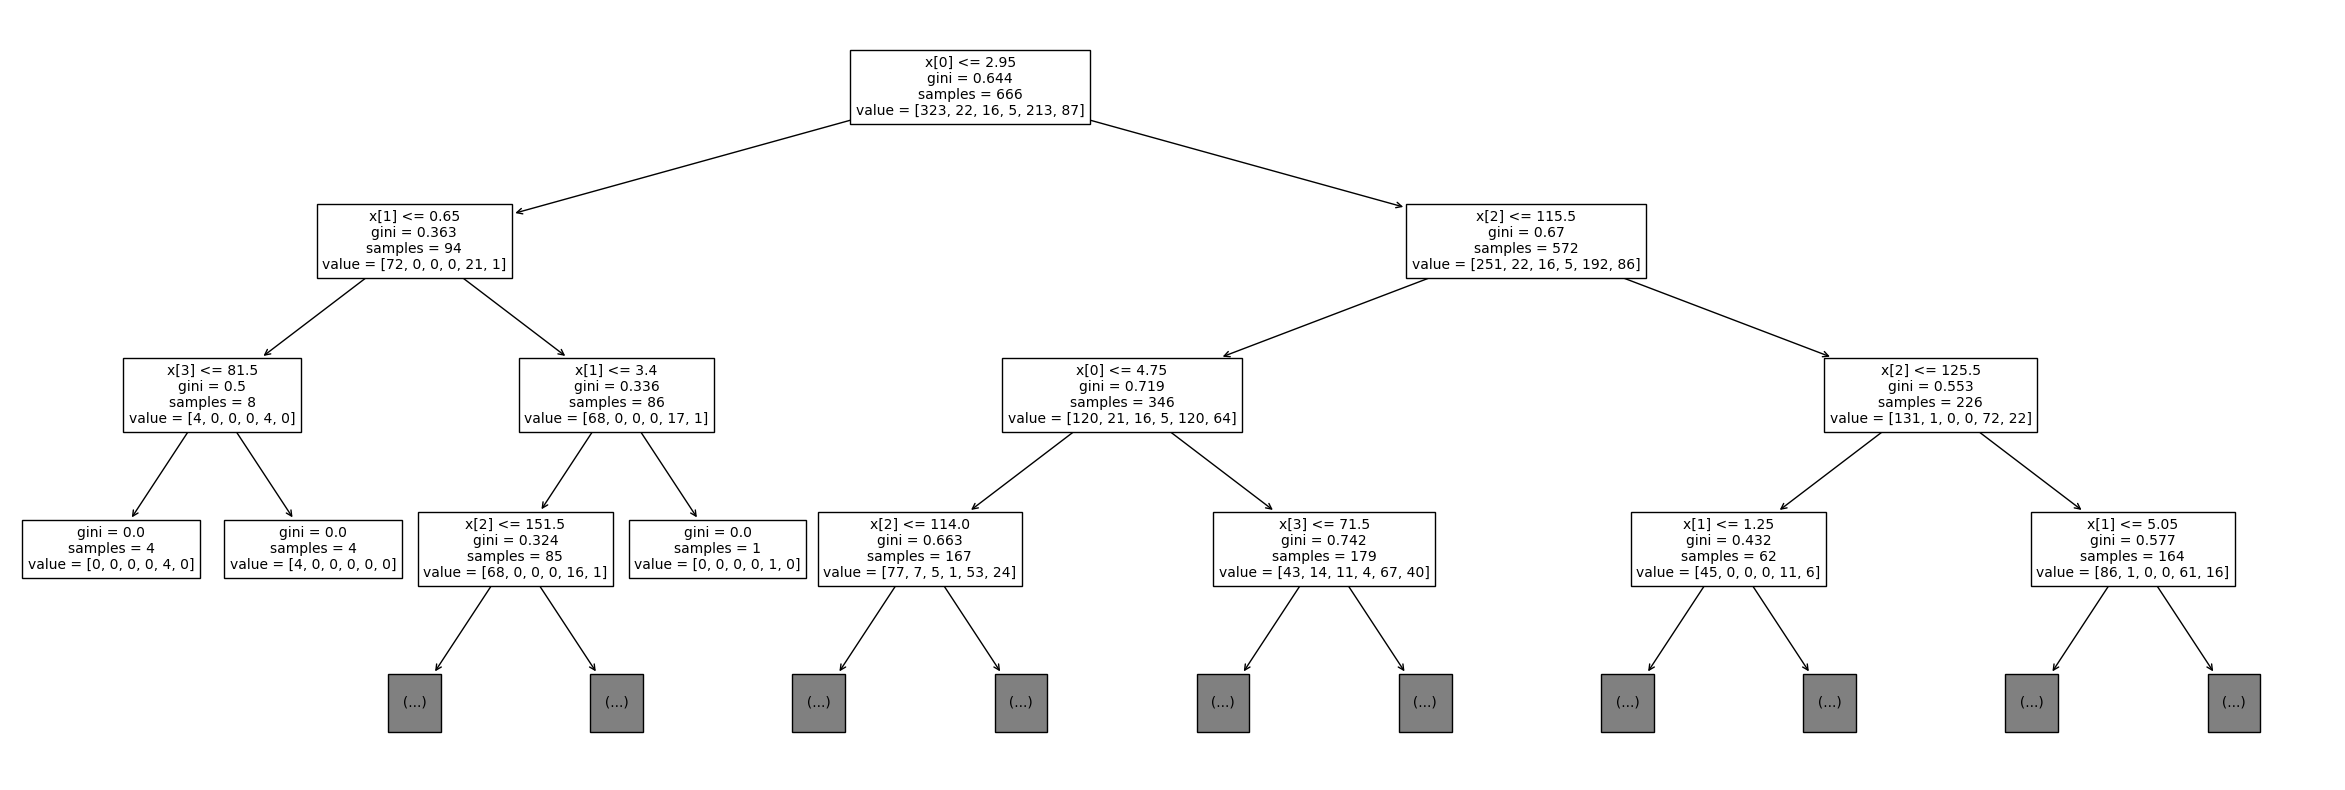

In [26]:
cart = tree.DecisionTreeClassifier()
cart.fit(train[['NCAA_fgpg','NCAA_ftpg','NCAA_games', 'height', 'allC','allG','allF']],train['NBA_category'])

plt.figure(figsize=(30,10))
tree.plot_tree(cart,fontsize=10,max_depth=3)
plt.show()

In [27]:
predictions = cart.predict(test[['NCAA_fgpg','NCAA_ftpg','NCAA_games', 'height', 'allC','allG','allF']])

sum(test['NBA_category']==predictions)/len(predictions)

0.4080717488789238

In [131]:
#create 3 dim PCA to describe players in ncaa

pca = PCA(n_components=4)
pca.fit(updated[['height','weight','NCAA__3ptapg', 'NCAA__3ptpg', 'NCAA_fgapg',
       'NCAA_fgpg', 'NCAA_ft', 'NCAA_ftapg', 'NCAA_ftpg',
       'NCAA_games', 'NCAA_ppg']])

PCA(n_components=4)

In [132]:
dim1 = pca.fit_transform(updated[['height','weight','NCAA__3ptapg', 'NCAA__3ptpg', 'NCAA_fgapg',
       'NCAA_fgpg', 'NCAA_ft', 'NCAA_ftapg', 'NCAA_ftpg',
       'NCAA_games', 'NCAA_ppg']])[:,0]
dim2 = pca.fit_transform(updated[['height','weight','NCAA__3ptapg', 'NCAA__3ptpg', 'NCAA_fgapg',
       'NCAA_fgpg', 'NCAA_ft', 'NCAA_ftapg', 'NCAA_ftpg',
       'NCAA_games', 'NCAA_ppg']])[:,1]
dim3 = pca.fit_transform(updated[['height','weight','NCAA__3ptapg', 'NCAA__3ptpg', 'NCAA_fgapg',
       'NCAA_fgpg', 'NCAA_ft', 'NCAA_ftapg', 'NCAA_ftpg',
       'NCAA_games', 'NCAA_ppg']])[:,2]

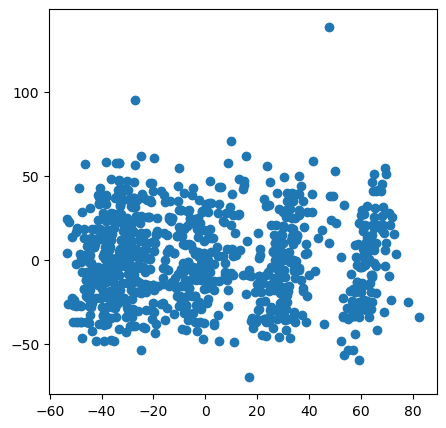

In [133]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.scatter(dim1, dim2)

#for i in range(1,10):
 #   l = i
  #  plt.annotate(data.loc[l,'name'],(dim1[l],dim2[l]))

In [134]:
dim = pca.fit_transform(updated[['height','weight','NCAA__3ptapg', 'NCAA__3ptpg', 'NCAA_fgapg',
       'NCAA_fgpg', 'NCAA_ft', 'NCAA_ftapg', 'NCAA_ftpg',
       'NCAA_games', 'NCAA_ppg']])

In [135]:
#use pca as regression.  well that's worse
reg = LinearRegression()
reg.fit(dim,updated['NBA_ppg'])
reg.score(dim,updated['NBA_ppg'])

0.20267161012326573

(array([331., 487., 338., 181., 110.,  48.,  32.,  12.,   2.,   2.]),
 array([ 0.  ,  3.01,  6.02,  9.03, 12.04, 15.05, 18.06, 21.07, 24.08,
        27.09, 30.1 ]),
 <BarContainer object of 10 artists>)

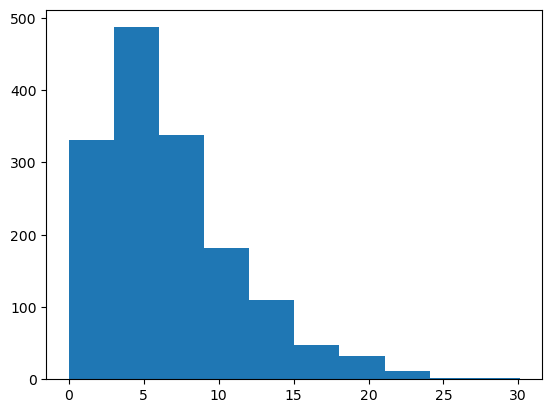

In [25]:
#distribution of nba points per games
plt.hist(data['NBA_ppg'])

In [44]:
#look at top 25 percent to see if that's less noisy
data['NBA_ppg'].quantile(.75)

9.1

In [45]:
top_25 = data[data['NBA_ppg']>9.1]

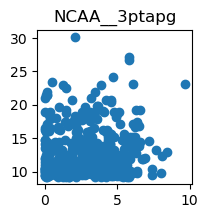

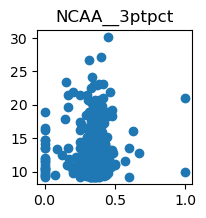

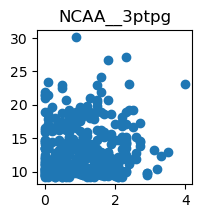

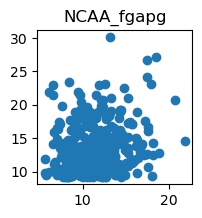

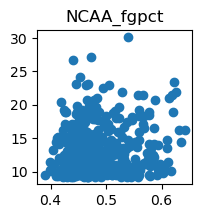

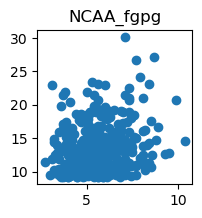

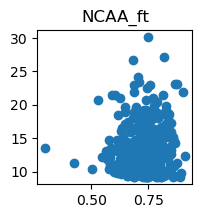

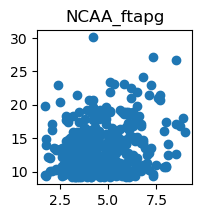

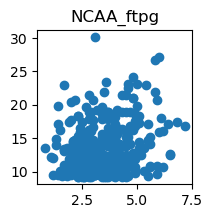

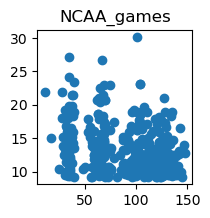

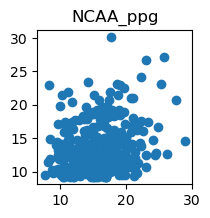

In [46]:
for c in ncaa_cols:
    plt.figure(figsize=(2,2))
    plt.scatter(top_25[c],top_25['NBA_ppg'])
    plt.title(c)
    plt.show()

In [47]:
lasso = Lasso()
lasso.fit(top_25[ncaa_cols],top_25['NBA_ppg'])
lasso.coef_

#lasso results: only NCAA games (negative relationship) and NCAA ppg (positive) were significant

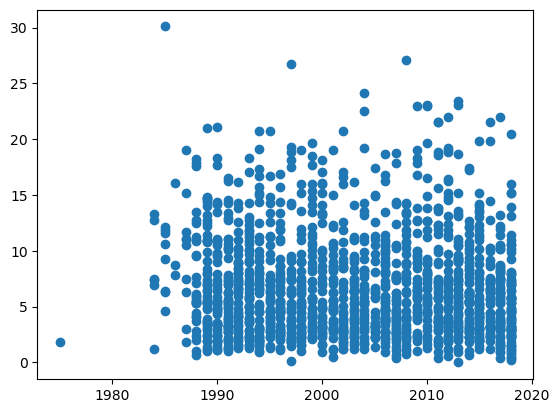

In [50]:
plt.scatter(data['active_from'],data['NBA_ppg'])

In [51]:
#look at only players that played a "significant" number of nba games
games = data[data['NBA_g_played']>50]

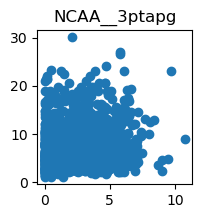

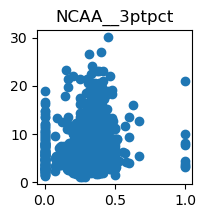

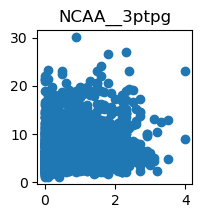

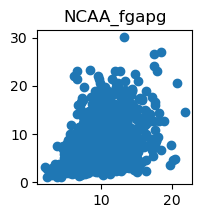

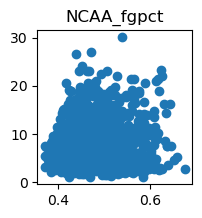

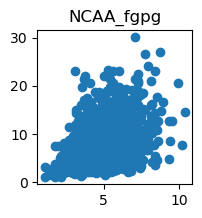

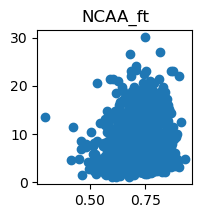

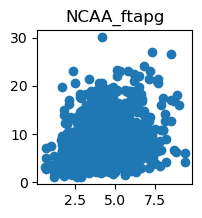

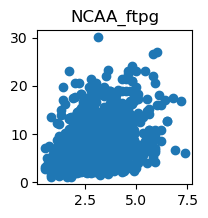

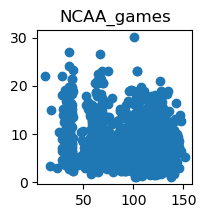

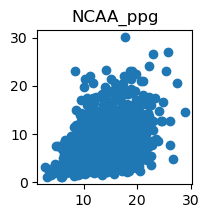

In [52]:
for c in ncaa_cols:
    plt.figure(figsize=(2,2))
    plt.scatter(games[c],games['NBA_ppg'])
    plt.title(c)
    plt.show()

In [54]:
linear = LinearRegression()
linear.fit(games[ncaa_cols],games['NBA_ppg'])
linear.coef_

array([  1.01671485,   1.38312445,  -0.9696417 ,  -1.49051033,
       -10.57254059,   4.81049219,  -3.04068823,  -1.22717646,
         2.64453454,  -0.03396282,  -0.5730968 ])

In [56]:
#what happens if data is scaled
scaler = preprocessing.MinMaxScaler()
data[ncaa_cols] = scaler.fit_transform(data[ncaa_cols])
data[nba_cols] = scaler.fit_transform(data[nba_cols])

In [58]:
linear.fit(data[ncaa_cols],data['NBA_ppg'])
linear.coef_

array([  6.07832493,   0.76526456,  -1.33829139, -25.28791792,
        -1.45518198,  31.65295013,  -1.73926898,  -7.24043026,
        11.69812755,  -4.62108576,  -3.63042489])

In [60]:
#play by play data - need to figure out how to give this to you because file's too large

nba = pd.read_csv('nba_playbyplay_2024.csv')
nba.head(5)

In [62]:
nba.columns

Index(['game_play_number', 'id', 'sequence_number', 'type_id', 'type_text',
       'away_score', 'home_score', 'period_number', 'clock_display_value',
       'scoring_play', 'score_value', 'team_id', 'athlete_id_1',
       'athlete_id_2', 'athlete_id_3', 'wallclock', 'shooting_play', 'game_id',
       'season', 'season_type', 'home_team_id', 'home_team_abbrev',
       'away_team_id', 'away_team_abbrev', 'qtr', 'time', 'half', 'game_half',
       'lead_qtr', 'lead_half', 'start_quarter_seconds_remaining',
       'start_half_seconds_remaining', 'start_game_seconds_remaining',
       'end_quarter_seconds_remaining', 'end_half_seconds_remaining',
       'end_game_seconds_remaining', 'period', 'lag_qtr', 'lag_half',
       'coordinate_x', 'coordinate_y', 'game_date', 'game_date_time',
       'type_abbreviation'],
      dtype='object')